In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

14th of April - 17:20 

Gathered 60 seconds of data, 
Individual finger movements, grouped finger movements (pairs) and all finger closing (grasping).

In [3]:
data = pd.read_csv("../data/FullHand/dataset-rel-test-full_hand-60s.csv")

In [4]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Palm_x,Palm_y,...,Pinky_MCP_z,Pinky_PIP_x,Pinky_PIP_y,Pinky_PIP_z,Pinky_DIP_x,Pinky_DIP_y,Pinky_DIP_z,Pinky_TIP_x,Pinky_TIP_y,Pinky_TIP_z
0,26,91,132,153,52,42,29,21,-0.0,-29.155041,...,0.985840,-12.157715,6.025589,4.698654,-7.572952,-20.287079,-4.750595,-4.000549,-9.645386,-18.151367
1,26,96,153,158,47,40,26,20,-0.0,-29.133907,...,0.796921,-12.367355,6.057907,4.704254,-7.580307,-20.297882,-4.718765,-4.007965,-9.680634,-18.207993
2,28,107,156,155,42,37,24,19,-0.0,-29.077293,...,0.856766,-12.216583,6.056442,4.823074,-7.286041,-19.858948,-4.905426,-4.138733,-9.700302,-18.087601
3,26,102,169,151,50,30,25,21,-0.0,-28.793003,...,0.058105,-13.003647,5.752075,4.285004,-7.815018,-20.315399,-5.410828,-4.906540,-10.509811,-18.864670
4,26,131,182,135,58,39,24,23,-0.0,-28.751802,...,0.013550,-13.022095,5.754669,4.289017,-7.772049,-20.236267,-5.435486,-4.923447,-10.500595,-18.822006


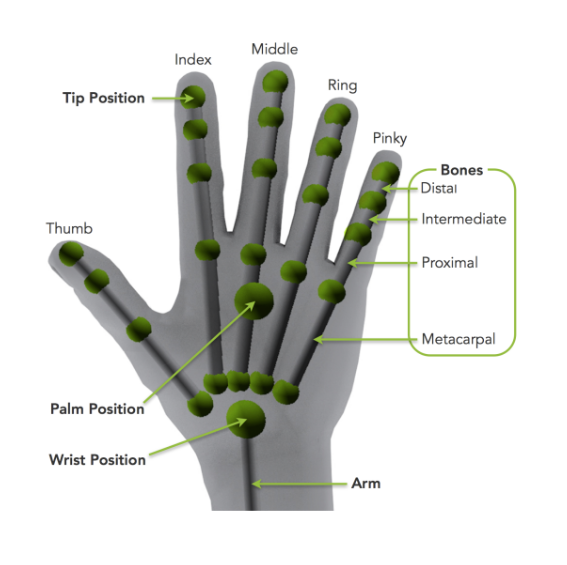

```
0 = JOINT_MCP – The metacarpophalangeal joint, or knuckle, of the finger.
1 = JOINT_PIP – The proximal interphalangeal joint of the finger.This is the middle joint of a finger.
2 = JOINT_DIP – The distal interphalangeal joint of the finger. This joint is closest to the tip.
3 = JOINT_TIP – The tip of the finger.
```

In [5]:
leap_bone_columns = [
    "Palm_x", "Palm_y", "Palm_z",
    "Wrist_x", "Wrist_y", "Wrist_z",
    'Thumb_MCP_x', 'Thumb_MCP_y', 'Thumb_MCP_z',
    'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
    'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z',
    'Thumb_TIP_x', 'Thumb_TIP_y', 'Thumb_TIP_z',
    'Index_MCP_x', 'Index_MCP_y', 'Index_MCP_z',
    'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
    'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z',
    'Index_TIP_x', 'Index_TIP_y', 'Index_TIP_z',
    'Middle_MCP_x', 'Middle_MCP_y', 'Middle_MCP_z',
    'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
    'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z',
    'Middle_TIP_x', 'Middle_TIP_y', 'Middle_TIP_z',
    'Ring_MCP_x', 'Ring_MCP_y', 'Ring_MCP_z',
    'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z',
    'Ring_DIP_x', 'Ring_DIP_y', 'Ring_DIP_z',
    'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
    'Pinky_MCP_x', 'Pinky_MCP_y', 'Pinky_MCP_z',
    'Pinky_PIP_x', 'Pinky_PIP_y', 'Pinky_PIP_z',
    'Pinky_DIP_x', 'Pinky_DIP_y', 'Pinky_DIP_z',
    'Pinky_TIP_x', 'Pinky_TIP_y', 'Pinky_TIP_z'
    ]
len(leap_bone_columns)

66

In [6]:
data.shape

(2960, 74)

## Plotting an example point. 

In [7]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Palm_x', 'Palm_y', 'Palm_z',
       'Wrist_x', 'Wrist_y', 'Wrist_z', 'Thumb_MCP_x', 'Thumb_MCP_y',
       'Thumb_MCP_z', 'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
       'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z', 'Thumb_TIP_x',
       'Thumb_TIP_y', 'Thumb_TIP_z', 'Index_MCP_x', 'Index_MCP_y',
       'Index_MCP_z', 'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
       'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z', 'Index_TIP_x',
       'Index_TIP_y', 'Index_TIP_z', 'Middle_MCP_x', 'Middle_MCP_y',
       'Middle_MCP_z', 'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
       'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z', 'Middle_TIP_x',
       'Middle_TIP_y', 'Middle_TIP_z', 'Ring_MCP_x', 'Ring_MCP_y',
       'Ring_MCP_z', 'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z', 'Ring_DIP_x',
       'Ring_DIP_y', 'Ring_DIP_z', 'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
       'Pinky_M

In [8]:
channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5','Channel_6', 'Channel_7', 'Channel_8']
bone_df = data.drop(channel_cols, 1)

examp_frame = bone_df.iloc[10].values

# Five finger, 4 joints + palm, wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3
examp_frame = examp_frame.reshape((3, NUM_POINTS//3))

### Plotting points of the hand

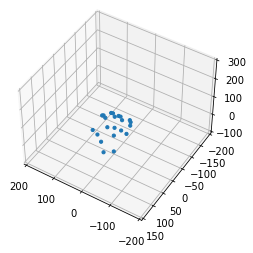

In [9]:
def plot_points(points, scatter):
    scatter.set_offsets(points[:2].T)
    scatter.set_3d_properties(points[2], zdir='z')
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)

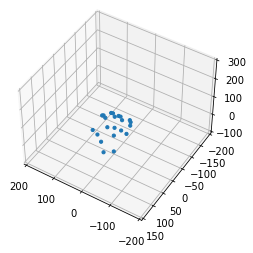

In [10]:
pred = data.iloc[10].drop(channel_cols).values

# Five finger, 4 joints + palm,wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3

# Change the shape by adding a new point on
pred_points = pred.reshape((3, (NUM_POINTS)//3))

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)

## Plotting the whole hand

In [11]:
# Plotting the whole hand
def plot_bone_lines(points, ax):
    '''
    Plot the lines for the hand based on a full hand model.
    (22 points, 66 vars)
    '''
    mcps = []

    # Wrist
    wrist = points[:,1]

    # For Each of the 5 fingers
    for i in range(0,5):
        n = 4*i + 2

        # Get each of the bones
        mcp = points[:,n+0]
        pip = points[:,n+1]
        dip = points[:,n+2]
        tip = points[:,n+3]

        # Connect the lowest joint to the middle joint
        bot = plt3d.art3d.Line3D([mcp[0], pip[0]], [mcp[1], pip[1]], [mcp[2], pip[2]])
        ax.add_line(bot)

        # Connect the middle joint to the top joint
        mid = plt3d.art3d.Line3D([pip[0], dip[0]], [pip[1], dip[1]], [pip[2], dip[2]])
        ax.add_line(mid)

        # Connect the top joint to the tip of the finger
        top = plt3d.art3d.Line3D([dip[0], tip[0]], [dip[1], tip[1]], [dip[2], tip[2]])
        ax.add_line(top)

        # Connect each of the fingers together
        mcps.append(mcp)
    for mcp in range(0,4):
        line = plt3d.art3d.Line3D([mcps[mcp][0], mcps[mcp+1][0]],
                                  [mcps[mcp][1], mcps[mcp+1][1]],
                                  [mcps[mcp][2], mcps[mcp+1][2]])
        ax.add_line(line)
    # Create the right side of the hand joining the pinkie mcp to the "wrist"
    line = plt3d.art3d.Line3D([wrist[0], mcps[4][0]],
                                  [wrist[1], mcps[3+1][1]],
                                  [wrist[2], mcps[3+1][2]])
    ax.add_line(line)

    # Generate the "Wrist", note right side is not right.
    line = plt3d.art3d.Line3D([wrist[0], mcps[0][0]],
                                  [wrist[1], mcps[0][1]],
                                  [wrist[2], mcps[0][2]])
    ax.add_line(line)

    # Connext the left hand side of the index finger to the thumb.
    thumb_mcp = points[:,1+2]
    pinky_mcp = points[:,4+2]
    line = plt3d.art3d.Line3D([thumb_mcp[0], pinky_mcp[0]],
                                  [thumb_mcp[1], pinky_mcp[1]],
                                  [thumb_mcp[2], pinky_mcp[2]])
    ax.add_line(line)

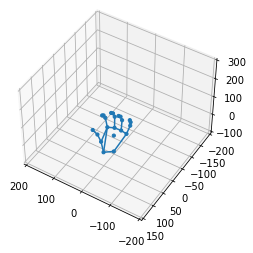

In [12]:
import mpl_toolkits.mplot3d as plt3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)
plot_bone_lines(examp_frame,ax)

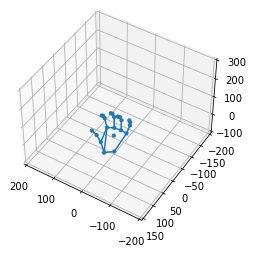

In [13]:
def plot_row_bones(row):
    channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']
    try:
        bone_df = row.drop(channel_cols)
    except:
        bone_df = row
    
    # Five finger, 4 joints + palm, wrist. x,y,z
    NUM_POINTS = (5 * 4 + 2) * 3
    examp_frame = bone_df.values.reshape((3, NUM_POINTS//3))
    
    # Plot setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
    ax.view_init(elev=45., azim=122)

    points_ = np.zeros((3, NUM_POINTS))
    sizes = [10]*(NUM_POINTS//3)
    sizes[0] = 30
    patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

    # Plot the hand
    plot_points(examp_frame, patches)
    plot_bone_lines(examp_frame,ax)
    
plot_row_bones(data.iloc[15])

In [14]:
df = data.copy(deep=True)

In [15]:
pred_points

array([[ -0.        , -29.68288231,  -4.59594345,  28.62545156,
         55.4685955 ,  77.02166939,  29.03950405,  57.70485497,
         72.97145653,  81.82505608,  10.97711468,  37.50795174,
         55.16724205,  66.21203804,  -8.81077957,  13.71101904,
         30.70543289,  42.19749451, -25.66235161, -16.04411888,
         -6.83771896,   3.13713455],
       [  0.        ,  41.41575623,  56.83174133,  23.38640594,
          4.703125  ,  -1.3491478 ,  -8.34436417, -37.77878177,
        -49.85831356, -54.90893745, -18.83125687, -56.62804604,
        -72.52913284, -78.44837189, -24.04793549, -60.40620041,
        -76.59039688, -82.92094421, -27.10231781, -59.67589378,
        -74.78306198, -84.8897171 ],
       [  0.        , -13.41175842, -15.85270691, -25.29794312,
        -28.25970459, -25.62716675,  15.89587402,  10.98446655,
         -1.78076172, -14.69972229,  11.64511108,   6.88223267,
         -6.73472595, -19.79464722,   3.71420288,  -1.04638672,
        -13.74023438, -26.0564

In [16]:
print("Correlation Matrix")
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Correlation Matrix

Top Absolute Correlations
Palm_y        Palm_z          0.999620
Ring_PIP_x    Pinky_MCP_x     0.999425
Palm_z        Thumb_DIP_z     0.997330
Ring_MCP_x    Ring_MCP_y      0.995504
Palm_y        Thumb_DIP_z     0.995459
Pinky_DIP_x   Pinky_DIP_y     0.994120
Pinky_MCP_z   Pinky_PIP_x     0.992847
Pinky_TIP_y   Pinky_TIP_z     0.992573
Middle_PIP_y  Middle_PIP_z    0.990338
Palm_y        Thumb_PIP_y     0.990019
dtype: float64


# Making a full hand baseline

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']

X = df[x_cols]
y = df.drop(x_cols,1)

train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

# Making our benchmark model
# Just predict the mean average number of bikes. 
y_train_mean = train_y.mean()

train_preds = np.ones(train_y.shape) * y_train_mean
preds = np.ones(test_y.shape) * y_train_mean

rmse = np.sqrt(mean_squared_error(train_y, train_preds))
print("Train RMSE: %f" % (rmse))

mae = mean_absolute_error(train_y, train_preds)
print("Train MAE: %f" % (mae))

rmse = np.sqrt(mean_squared_error(test_y, preds))
print("Test RMSE: %f" % (rmse))

mae = mean_absolute_error(test_y, preds)
print("Test MAE: %f" % (mae))

r2_score(test_y, preds)

Train RMSE: 39.146018
Train MAE: 30.205980
Test RMSE: 39.211030
Test MAE: 30.249370


-115.08571685736419

In [18]:
X

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8
0,26,91,132,153,52,42,29,21
1,26,96,153,158,47,40,26,20
2,28,107,156,155,42,37,24,19
3,26,102,169,151,50,30,25,21
4,26,131,182,135,58,39,24,23
...,...,...,...,...,...,...,...,...
2955,24,91,138,125,76,33,22,22
2956,27,103,125,125,62,30,21,22
2957,29,119,134,108,60,32,19,20
2958,30,120,138,110,57,32,20,19


In [19]:
y

,Palm_x,Palm_y,Palm_z,Wrist_x,Wrist_y,Wrist_z,Thumb_MCP_x,Thumb_MCP_y,Thumb_MCP_z,Thumb_PIP_x,...,Pinky_MCP_z,Pinky_PIP_x,Pinky_PIP_y,Pinky_PIP_z,Pinky_DIP_x,Pinky_DIP_y,Pinky_DIP_z,Pinky_TIP_x,Pinky_TIP_y,Pinky_TIP_z
0,-0.0,-29.155041,-3.826160,29.107265,55.939213,77.573997,29.255807,56.781693,71.568939,79.900223,...,0.985840,-12.157715,6.025589,4.698654,-7.572952,-20.287079,-4.750595,-4.000549,-9.645386,-18.151367
1,-0.0,-29.133907,-3.797989,29.132072,55.974621,77.609161,29.247327,56.776794,71.557999,79.890343,...,0.796921,-12.367355,6.057907,4.704254,-7.580307,-20.297882,-4.718765,-4.007965,-9.680634,-18.207993
2,-0.0,-29.077293,-3.741123,29.715533,56.807529,78.403702,29.082968,56.786491,71.666164,80.104134,...,0.856766,-12.216583,6.056442,4.823074,-7.286041,-19.858948,-4.905426,-4.138733,-9.700302,-18.087601
3,-0.0,-28.793003,-3.375317,30.132217,57.182423,78.708927,28.899858,56.547577,71.443790,79.945705,...,0.058105,-13.003647,5.752075,4.285004,-7.815018,-20.315399,-5.410828,-4.906540,-10.509811,-18.864670
4,-0.0,-28.751802,-3.323442,30.206380,57.228518,78.734434,28.868271,56.521894,71.411089,79.918020,...,0.013550,-13.022095,5.754669,4.289017,-7.772049,-20.236267,-5.435486,-4.923447,-10.500595,-18.822006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,-0.0,-25.684479,0.582344,39.262802,68.499048,88.671070,27.369803,54.007801,68.661158,78.765564,...,-3.965759,-12.329147,8.983322,-4.100906,-16.438766,-26.347931,-2.592972,-7.092789,-10.976624,-15.234543
2956,-0.0,-25.631077,0.648060,39.284188,68.493254,88.624912,27.341065,53.873013,68.430117,78.444664,...,-4.091965,-12.440521,8.938873,-4.195709,-16.531906,-26.427902,-2.665741,-7.165344,-11.037445,-15.278595
2957,-0.0,-25.617073,0.665211,39.294207,68.498875,88.626953,27.333267,53.833677,68.364279,78.355549,...,-4.139465,-12.481674,8.925735,-4.229202,-16.565063,-26.456100,-2.686844,-7.183990,-11.050430,-15.284256
2958,-0.0,-25.603214,0.680962,39.308100,68.514769,88.643417,27.321008,53.755602,68.214678,78.136921,...,-4.276337,-12.615402,8.900330,-4.314438,-16.650208,-26.527634,-2.726898,-7.229568,-11.089355,-15.311844


# Making a baseline Neural Network

In [20]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [21]:
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']

X = df[x_cols]
y = df.drop(x_cols,1)

rel_hand_scaler = StandardScaler()
emg_scaler = StandardScaler()

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)
# Fit the scaler on the training set.
train_X = emg_scaler.fit_transform(train_X)
train_y = rel_hand_scaler.fit_transform(train_y)
# Scale the output data.
test_X = emg_scaler.transform(test_X)
test_y = rel_hand_scaler.transform(test_y)

In [23]:
model = Sequential()

# The Input Layer :
model.add(Dense(16,input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))

# The Output Layer :
model.add(Dense(66,activation='linear'))

# Compile the network :
model.compile(loss='mse', optimizer='Adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 66)                4290      
Total params: 7,090
Trainable params: 7,090
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(train_X, train_y, epochs=200, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/200
70/70 [==============================] - 0s 2ms/step - loss: 0.9397 - val_loss: 0.9474
Epoch 2/200
70/70 [==============================] - 0s 2ms/step - loss: 0.8751 - val_loss: 0.8872
Epoch 3/200
70/70 [==============================] - 0s 1ms/step - loss: 0.8296 - val_loss: 0.8639
Epoch 4/200
70/70 [==============================] - 0s 1ms/step - loss: 0.8065 - val_loss: 0.8382
Epoch 5/200
70/70 [==============================] - 0s 1ms/step - loss: 0.7900 - val_loss: 0.8242
Epoch 6/200
70/70 [==============================] - 0s 1ms/step - loss: 0.7748 - val_loss: 0.8112
Epoch 7/200
70/70 [==============================] - 0s 1ms/step - loss: 0.7607 - val_loss: 0.7978
Epoch 8/200
70/70 [==============================] - 0s 1ms/step - loss: 0.7493 - val_loss: 0.7861
Epoch 9/200
70/70 [==============================] - 0s 1ms/step - loss: 0.7378 - val_loss: 0.7794
Epoch 10/200
70/70 [==============================] - 0s 2ms/step - loss: 0.7302 - val_loss: 0.7706
Epoch 11/

70/70 [==============================] - 0s 1ms/step - loss: 0.5639 - val_loss: 0.6637
Epoch 84/200
70/70 [==============================] - 0s 1ms/step - loss: 0.5610 - val_loss: 0.6664
Epoch 85/200
70/70 [==============================] - 0s 1ms/step - loss: 0.5601 - val_loss: 0.6631
Epoch 86/200
70/70 [==============================] - 0s 1ms/step - loss: 0.5625 - val_loss: 0.6634
Epoch 87/200
70/70 [==============================] - 0s 1ms/step - loss: 0.5586 - val_loss: 0.6613
Epoch 88/200
70/70 [==============================] - 0s 1ms/step - loss: 0.5555 - val_loss: 0.6577
Epoch 89/200
70/70 [==============================] - 0s 1ms/step - loss: 0.5563 - val_loss: 0.6562
Epoch 90/200
70/70 [==============================] - 0s 1ms/step - loss: 0.5541 - val_loss: 0.6583
Epoch 91/200
70/70 [==============================] - 0s 1ms/step - loss: 0.5530 - val_loss: 0.6667
Epoch 92/200
70/70 [==============================] - 0s 1ms/step - loss: 0.5525 - val_loss: 0.6586
Epoch 93/200


In [26]:
# Evaluate the model on the test data
mse = model.evaluate(test_X, test_y)
mse

24/24 [==============================] - 0s 730us/step - loss: 0.6563


0.6562808752059937

Note that using wrist as the rel_point gives 0.10, which was a lower loss than using the palm

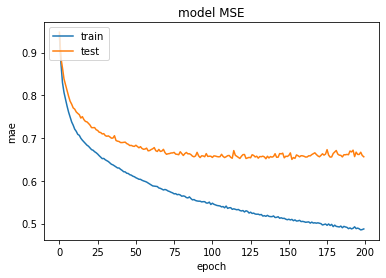

In [27]:
# summarize history for loss
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model MSE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
prediction = model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[-8.7754003e-04  1.0545776e+00  1.1171409e+00 ...  7.1062756e-01
   6.0700208e-01  6.0976851e-01]
 [-1.0229606e-03  5.6242073e-01  5.7778984e-01 ...  1.5885630e-01
   2.5745470e-02  2.7175210e-02]
 [-6.0592080e-04  2.3360433e-01  2.3426302e-01 ... -2.0603833e+00
  -1.9433761e+00 -1.7870895e+00]
 ...
 [-5.3403917e-04 -1.1841878e+00 -1.1846014e+00 ... -8.4925383e-01
  -8.8615274e-01 -9.1511792e-01]
 [-5.4013671e-04 -6.8251812e-01 -6.6262096e-01 ... -2.0045510e-01
  -9.3774751e-02 -3.8542502e-02]
 [-1.8386391e-04 -6.9265682e-01 -6.9615728e-01 ...  3.2943249e-02
   7.5025424e-02  6.5189846e-02]]
MSE:  27.33940463627704
RMSE:  5.228709653086222
MAE:  2.95588512729148


In [29]:
prediction = model.predict(test_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(test_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[-4.5049565e-06  1.3522451e-01  1.9394498e-01 ...  4.3251178e-01
   4.6078485e-01  4.7190204e-01]
 [-8.7510090e-04 -7.1135086e-01 -6.2075865e-01 ... -3.4064233e+00
  -3.3668852e+00 -3.1552842e+00]
 [-6.1699393e-05 -1.3594567e+00 -1.3763057e+00 ... -5.9100866e-02
  -4.8829131e-03  7.9832748e-03]
 ...
 [-5.8942282e-04  4.3737227e-01  4.4054431e-01 ...  8.8437259e-02
   4.2439986e-02  6.5242447e-02]
 [-5.8826065e-04  1.6924892e-01  1.9087942e-01 ...  2.6290509e-01
   2.7017626e-01  2.5774345e-01]
 [-6.7539624e-04 -6.0026234e-01 -6.1047447e-01 ... -5.8251113e-01
  -6.5339762e-01 -7.0003843e-01]]
MSE:  35.71878606050352
RMSE:  5.976519560789835
MAE:  3.439322011276025


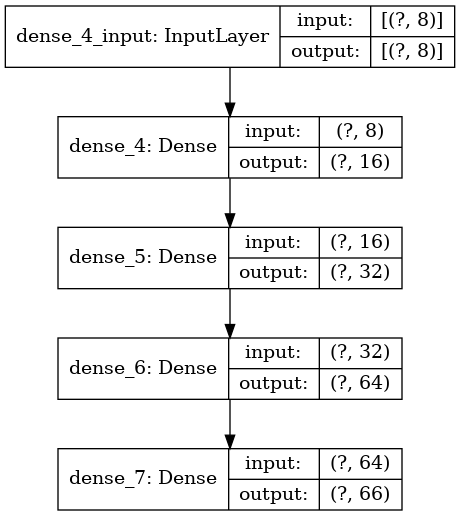

In [36]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

# Plot the predicted vs ground truth

### Save the model and the scalers

In [31]:
import joblib

model_name = "NNRel-60secs-FULL-StanScaled"

model.save(f"../models/{model_name}.h5")
# Save hand scaler to file.
# Scales the output of the network, the relative position of the hand, min_max
joblib.dump(rel_hand_scaler, f'../models/{model_name}-Hand.gz')

# Scales the input to the network, the emg data. 
joblib.dump(emg_scaler, f'../models/{model_name}-EMG.gz')

['../models/NNRel-60secs-FULL-StanScaled-EMG.gz']

In [32]:
# Making a prediction in the prediction script.
from keras.models import load_model
model = load_model(f"../models/{model_name}.h5")

input_scaler = joblib.load(f'../models/{model_name}-EMG.gz')
output_scaler = joblib.load(f'../models/{model_name}-Hand.gz')

# Get some input data
semg_input = np.array([[ 31, 140, 140,  83,  42,  30,  22,  21]])
# Scale the input
scaled_input = input_scaler.transform(semg_input)
# Get a prediction
pred = model.predict(scaled_input)
# Scale it back to a value
scaled_pred = output_scaler.inverse_transform(pred)
scaled_pred
# Five finger, 4 joints + palm, wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3
pred_points = scaled_pred.reshape((3, NUM_POINTS//3))

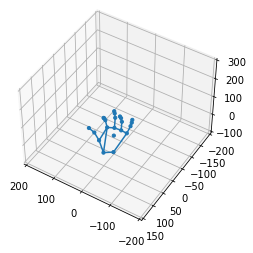

In [33]:
# Plotting pred points
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(pred_points, patches)
plot_bone_lines(pred_points, ax)

In [34]:
prediction = model.predict(test_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(test_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[-4.5049565e-06  1.3522451e-01  1.9394498e-01 ...  4.3251178e-01
   4.6078485e-01  4.7190204e-01]
 [-8.7510090e-04 -7.1135086e-01 -6.2075865e-01 ... -3.4064233e+00
  -3.3668852e+00 -3.1552842e+00]
 [-6.1699393e-05 -1.3594567e+00 -1.3763057e+00 ... -5.9100866e-02
  -4.8829131e-03  7.9832748e-03]
 ...
 [-5.8942282e-04  4.3737227e-01  4.4054431e-01 ...  8.8437259e-02
   4.2439986e-02  6.5242447e-02]
 [-5.8826065e-04  1.6924892e-01  1.9087942e-01 ...  2.6290509e-01
   2.7017626e-01  2.5774345e-01]
 [-6.7539624e-04 -6.0026234e-01 -6.1047447e-01 ... -5.8251113e-01
  -6.5339762e-01 -7.0003843e-01]]
MSE:  35.71878606050352
RMSE:  5.976519560789835
MAE:  3.439322011276025


Calculating error per feature, e.g. thumb error

In [68]:
leap_bone_columns = [
    "Palm_x", "Palm_y", "Palm_z",
    "Wrist_x", "Wrist_y", "Wrist_z",
    'Thumb_MCP_x', 'Thumb_MCP_y', 'Thumb_MCP_z',
    'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
    'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z',
    'Thumb_TIP_x', 'Thumb_TIP_y', 'Thumb_TIP_z',
    'Index_MCP_x', 'Index_MCP_y', 'Index_MCP_z',
    'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
    'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z',
    'Index_TIP_x', 'Index_TIP_y', 'Index_TIP_z',
    'Middle_MCP_x', 'Middle_MCP_y', 'Middle_MCP_z',
    'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
    'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z',
    'Middle_TIP_x', 'Middle_TIP_y', 'Middle_TIP_z',
    'Ring_MCP_x', 'Ring_MCP_y', 'Ring_MCP_z',
    'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z',
    'Ring_DIP_x', 'Ring_DIP_y', 'Ring_DIP_z',
    'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
    'Pinky_MCP_x', 'Pinky_MCP_y', 'Pinky_MCP_z',
    'Pinky_PIP_x', 'Pinky_PIP_y', 'Pinky_PIP_z',
    'Pinky_DIP_x', 'Pinky_DIP_y', 'Pinky_DIP_z',
    'Pinky_TIP_x', 'Pinky_TIP_y', 'Pinky_TIP_z'
    ]
len(leap_bone_columns)

66

In [67]:
pred_points = preds.reshape(740, 3, 66//3)
goal_points = goal.reshape(740, 3, 66//3)

palm_preds = pred_points[:,:,0]
palm_goals = goal_points[:,:,0]

palm_mse = mean_squared_error(palm_goals, palm_preds)
palm_mse

1.0875626856435817e-05

In [70]:
wrist_preds = pred_points[:,:,1]
wrist_goals = goal_points[:,:,1]

wrist_mse = mean_squared_error(wrist_goals, wrist_preds)
wrist_mse

10.780200176246254

In [72]:
thumb_mcp_preds = pred_points[:,:,2]
thumb_mcp_goals = goal_points[:,:,2]

thumb_mcp_mse = mean_squared_error(thumb_mcp_goals, thumb_mcp_preds)
thumb_mcp_mse

15.271220099048984

In [82]:
finger_bones = ['metacarpals', 'proximal', 'intermediate', 'distal']
finger_names = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']

feats = ["Palm", "Wrist"]

for finger in finger_names:
    for bone in finger_bones:
        feats.append(finger +" "+ bone)
feats

['Palm',
 'Wrist',
 'Thumb metacarpals',
 'Thumb proximal',
 'Thumb intermediate',
 'Thumb distal',
 'Index metacarpals',
 'Index proximal',
 'Index intermediate',
 'Index distal',
 'Middle metacarpals',
 'Middle proximal',
 'Middle intermediate',
 'Middle distal',
 'Ring metacarpals',
 'Ring proximal',
 'Ring intermediate',
 'Ring distal',
 'Pinky metacarpals',
 'Pinky proximal',
 'Pinky intermediate',
 'Pinky distal']

In [83]:
len(feats)

22

In [89]:
errs = []
for i in range(len(feats)):
    feat_preds = pred_points[:,:,i]
    feat_goals = goal_points[:,:,i]

    feat_mse = mean_squared_error(feat_goals, feat_preds)
    errs.append(feat_mse)
errs

[1.0875626856435817e-05,
 10.780200176246254,
 15.271220099048984,
 13.474320214318661,
 43.57190112791636,
 142.88942798792496,
 1.9141685989018764,
 15.071569206153882,
 53.241825897697105,
 109.33711284476733,
 2.4219607307248814,
 22.344041516661893,
 63.56812722527263,
 109.2310144000312,
 2.2854127839554192,
 17.02203522225584,
 46.16859129356427,
 80.04057736979594,
 2.1496048228916673,
 21.51625757334149,
 55.708007723929164,
 103.681708451581]

<BarContainer object of 22 artists>

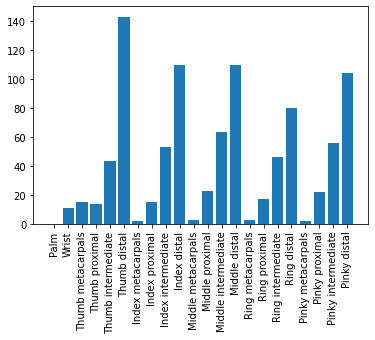

In [98]:
plt.xticks(rotation='vertical')
plt.bar(range(len(errs)),errs,tick_label=feats)

Text(0, 0.5, 'RMSE (mm)')

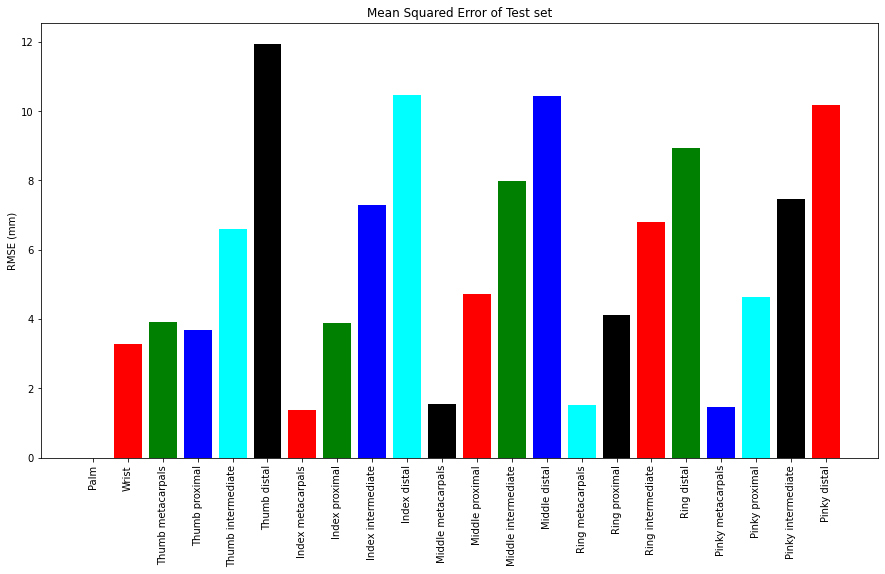

In [113]:
finger_bones = ['metacarpals', 'proximal', 'intermediate', 'distal']
finger_names = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']

feats = ["Palm", "Wrist"]

for finger in finger_names:
    for bone in finger_bones:
        feats.append(finger +" "+ bone)
# Calculating the error for each feature
errs = []
for i in range(len(feats)):
    feat_preds = pred_points[:,:,i]
    feat_goals = goal_points[:,:,i]

    feat_mse = mean_squared_error(feat_goals, feat_preds)**0.5
    errs.append(feat_mse)
# Plotting
plt.figure(figsize=(15,8))
plt.xticks(rotation='vertical')
c =['black', 'red', 'green', 'blue', 'cyan']
fig = plt.bar(range(len(errs)),errs,tick_label=feats,color=c)
plt.title("Mean Squared Error of Test set")
plt.ylabel("RMSE (mm)")

Text(0, 0.5, 'RMSE (mm)')

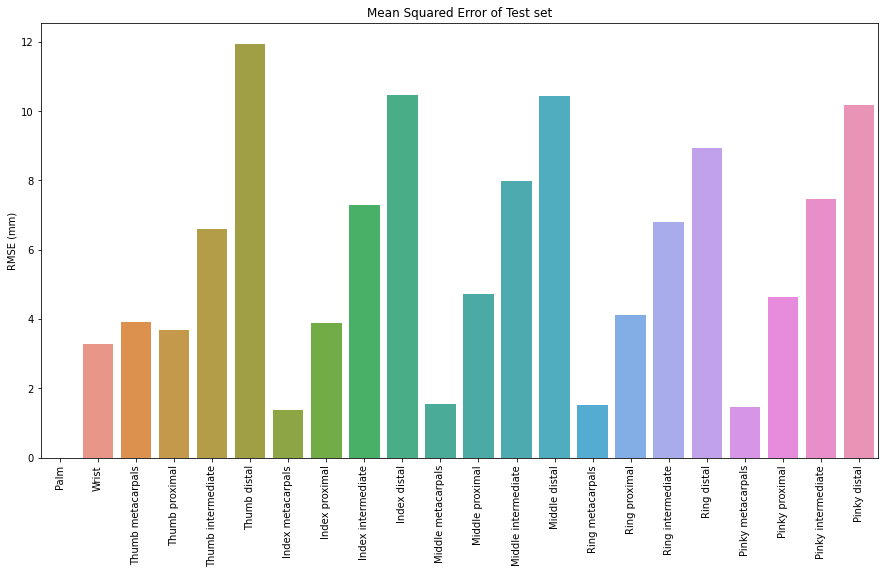

In [127]:
plt.figure(figsize=(15,8))
plt.xticks(rotation='vertical')
ax = sns.barplot(x=feats,y=errs)
plt.title("Mean Squared Error of Test set")
plt.ylabel("RMSE (mm)")

# PCA on Y

In [36]:
from sklearn.decomposition import PCA

In [42]:
leap_df = y.values.astype(float)

Y_scaled = StandardScaler().fit_transform(leap_df)


pca = PCA()
principal_components = pca.fit_transform(Y_scaled)

In [51]:
explained_var = np.round(np.cumsum(pca.explained_variance_ratio_), decimals=3)
explained_var

array([0.328, 0.504, 0.645, 0.739, 0.803, 0.852, 0.897, 0.928, 0.952,
       0.965, 0.975, 0.981, 0.985, 0.988, 0.991, 0.993, 0.994, 0.995,
       0.996, 0.997, 0.997, 0.998, 0.998, 0.999, 0.999, 0.999, 0.999,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   ])

In [52]:
explained_var[8]

0.952

In [ ]:
# Make an instance of the Model that retains 95% of the variance
pca = PCA(.95)

